In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly import graph_objects as go
import pathlib
import datetime
from IPython.display import IFrame, Image

In [2]:
# Convenience function to allow changing between interactive and static images
# Needed to show figures on GitHub notebook preview
plotly_interactive = False
def show_figure(fig: go.Figure):
    global fig_count
    if plotly_interactive:
        return fig
    else:
        return Image(data=fig.to_image(format='png', scale=2))

In [3]:
dfs = [
    pd.read_csv(
        fn,
        parse_dates=[
            'aimed_arrival',
            # 'expected_delay',
        ]
    )
    for fn in pathlib.Path('deviations').glob('*.csv')
]
df = pd.concat(dfs, ignore_index=True)
df['expected_delay'] = pd.to_timedelta(df['expected_delay'])
df = df[df.line_id == "RUT:Line:5260"]

C:\Users\veggi\AppData\Local\Temp\ipykernel_15064\1565559557.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  arrival_time = pd.to_datetime(arrival_time.dt.strftime('%H:%M:%S'))


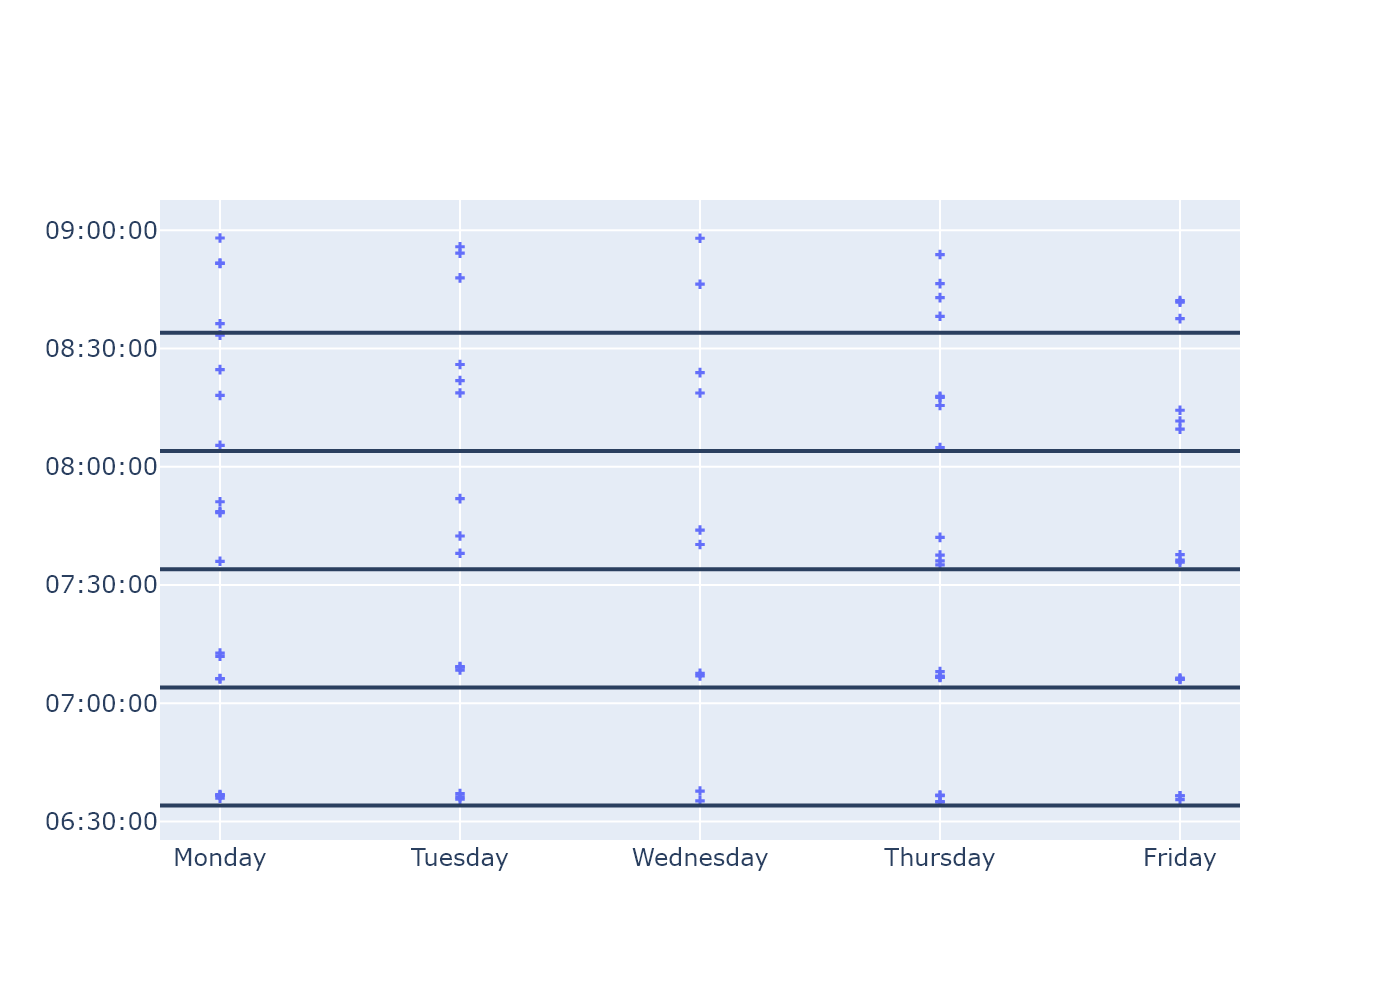

In [4]:
arrival_time = df["expected_delay"] + df["aimed_arrival"]
# Convert arrival_time to just time of day by setting all dates to a common reference
arrival_time = pd.to_datetime(arrival_time.dt.strftime('%H:%M:%S'))

ref = arrival_time.iloc[0].date()
h_lines = [
    datetime.datetime.combine(ref, datetime.time(h, m))
    for h, m in [
        (6, 34),
        (7, 4),
        (7, 34),
        (8, 4),
        (8, 34),
    ]
]

fig = go.Figure()
fig.add_scatter(
    x=df["aimed_arrival"].dt.day_name(),
    y=arrival_time,
    mode="markers",
    marker=dict(symbol="cross", size=4)
)
for h_line in h_lines:
    fig.add_hline(y=h_line)
fig.layout.yaxis.tickformat = "%H:%M:%S"
show_figure(fig)

In [5]:
# TODO:
# - Make it easier to see the point density: smaller dots, jitter, histogram, etc.
# - Make github-friendly plots (see SOM)